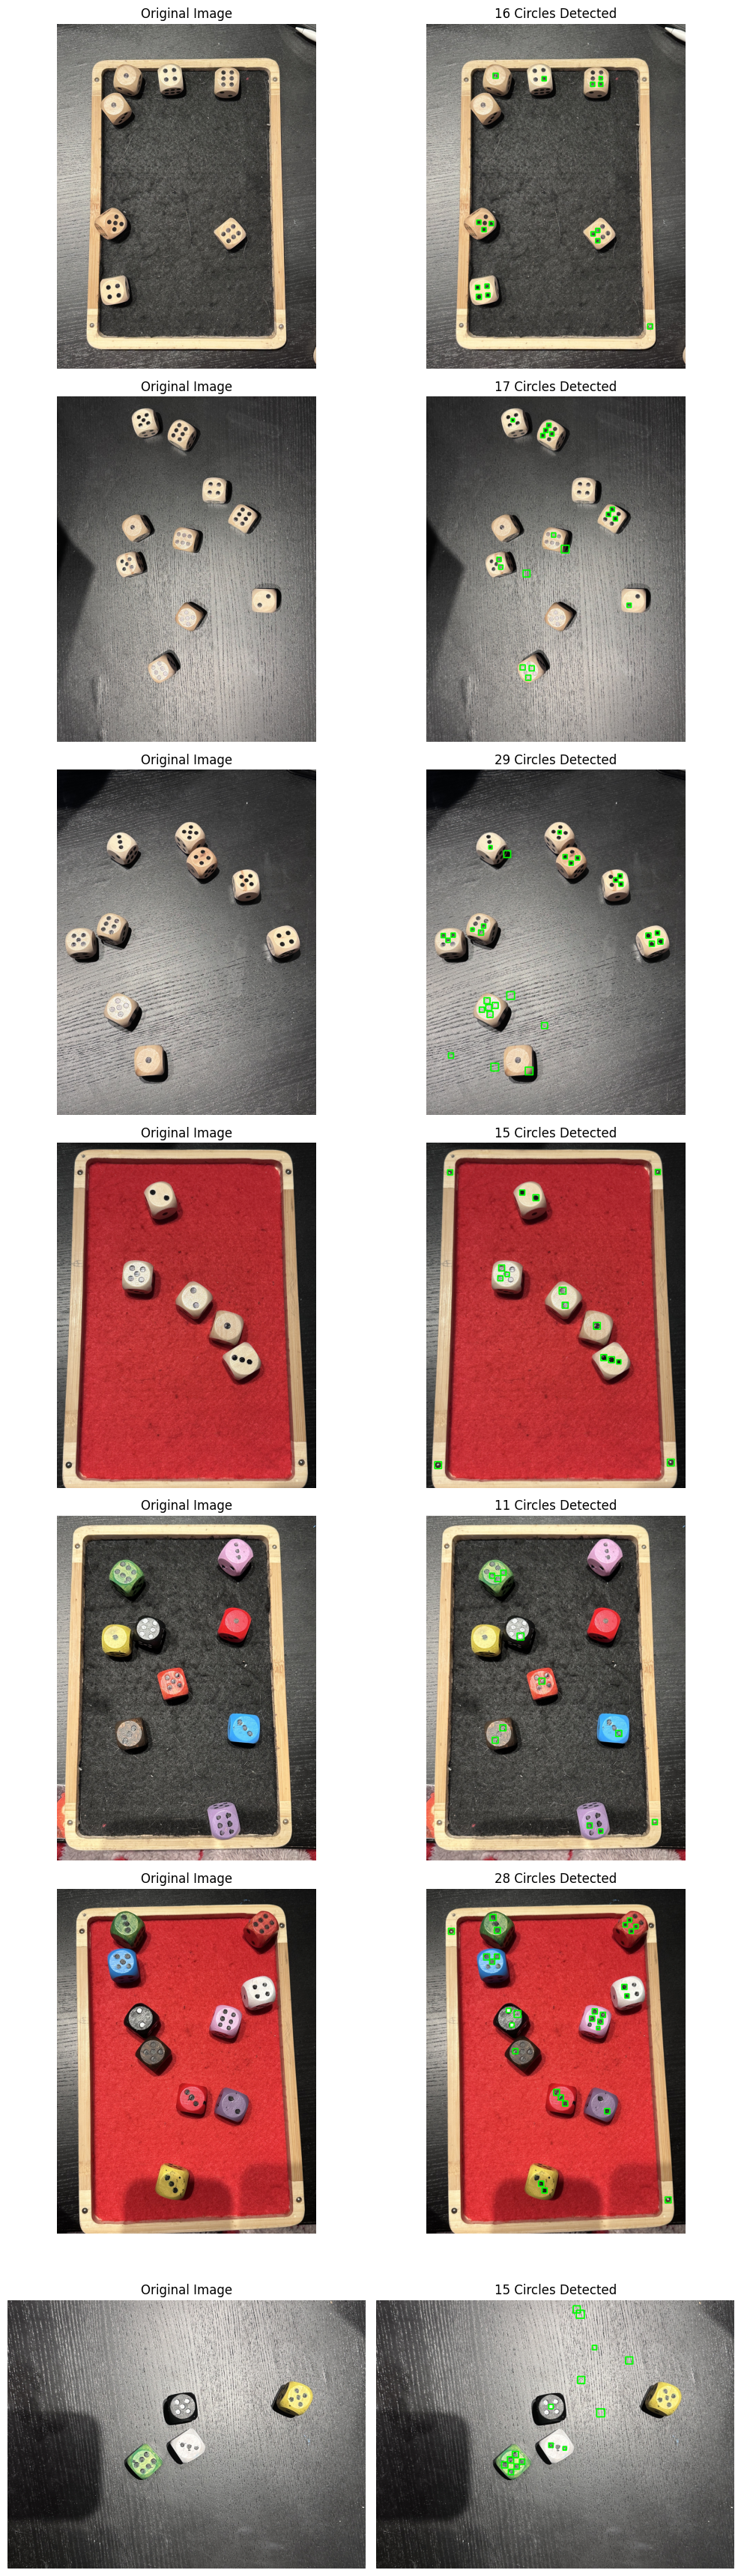

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def draw_bounding_boxes_for_circles(image, circles):
    # Draw the bounding rectangle for each circle
    for circle in circles:
        x, y, r = circle
        top_left = (int(x - r), int(y - r))
        bottom_right = (int(x + r), int(y + r))
        cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
    return image

def isolate_and_count_dice(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (7, 7), 0)

    # Detect circles
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=10,
                               param1=80, param2=20, minRadius=1, maxRadius=10)
    
    # Initialize the count of circles
    count_circles = 0
    
    if circles is not None:
        circles = np.uint16(np.around(circles))[0, :]
        count_circles = len(circles)
        image_with_boxes = draw_bounding_boxes_for_circles(image, circles)
    else:
        image_with_boxes = image

    # Return both the image and the count of circles
    return image_with_boxes, count_circles

def display_original_and_isolated(directory):
    image_files = [f for f in os.listdir(directory) if f.endswith(('.png', '.jpg', '.jpeg'))]
    num_images = len(image_files)
    cols = 2
    rows = num_images

    fig, axs = plt.subplots(rows, cols, figsize=(10, 5 * rows))

    if rows > 1:
        axs = axs.ravel()
    else:
        axs = [axs]

    for i, img_file in enumerate(image_files):
        img = cv2.imread(os.path.join(directory, img_file))
        scale_percent = 20
        width = int(img.shape[1] * scale_percent / 100)
        height = int(img.shape[0] * scale_percent / 100)
        dim = (width, height)
        resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

        isolated_dice, count_circles = isolate_and_count_dice(resized)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        isolated_rgb = cv2.cvtColor(isolated_dice, cv2.COLOR_BGR2RGB)

        axs[2*i].imshow(img_rgb)
        axs[2*i].set_title('Original Image')
        axs[2*i].axis('off')

        axs[2*i + 1].imshow(isolated_rgb)
        # Update title with the count of circles
        axs[2*i + 1].set_title(f'{count_circles} Circles Detected')
        axs[2*i + 1].axis('off')

    plt.tight_layout()
    plt.show()

directory_path = './Images'
display_original_and_isolated(directory_path)
